 # Dialogue State Tracking Analysis


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

# Update the path to the file as per your Google Drive structure
file_path = '/content/drive/MyDrive/Project/DST-Final.xlsx'

# Load the Excel file
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
df.head()

,cid,text,original_intent,confirmed_intent,intent_flag,original_slots,NLU_slots,slot_percentage,whatever_original,whatever_NLU,whatever_check,original_status,DST_status,status_flag,DST_result,DST_Performance,JGA,FGA,AGA
0,1342.0,دلم میخواد دعا بخونم میتونی برام بیاری,adie,adie,1.0,[],[],1.0,0.0,0.0,1.0,not-completed,not-completed,1.0,{'question': 'دعای مورد نظرت رو بگو'},1.0,1.0,1,1.0
1,1342.0,دلم میخواد دعا بخونم میتونی برام بیاری دعای عهد,adie,adie,1.0,['prayer_name'],[],0.0,0.0,0.0,1.0,completed,not-completed,0.0,{'question': 'دعای مدنظرت چیه؟'},1.0,0.0,1,0.6
2,1343.0,دسترسی به دعاها داری برام بیاری؟,adie,adie,1.0,[],[],1.0,0.0,0.0,1.0,not-completed,not-completed,1.0,{'question': 'دعای مورد نظرت رو بگو'},1.0,1.0,1,1.0
3,1343.0,دسترسی به دعاها داری برام بیاری؟ دعای ابوحمزه ...,adie,adie,1.0,['prayer_name'],['prayer_name'],1.0,0.0,0.0,1.0,completed,completed,1.0,{'title': 'ابوحمزه ثمالی'},1.0,1.0,1,1.0
4,1344.0,پدربزرگم میگفت هرشب باید دعا خوند میتونی دعا ب...,adie,adie,1.0,[],[],1.0,0.0,0.0,1.0,not-completed,not-completed,1.0,{'question': 'دعای مورد نظرت رو بگو'},1.0,1.0,1,1.0


In [5]:

import matplotlib.pyplot as plt

In [6]:
# Assuming df is your DataFrame and 'original_intent' is the column with intent information

# Get the number of unique intents
number_of_intents = df['original_intent'].nunique()

print(f"Number of unique intents: {number_of_intents}")

Number of unique intents: 21


### Joint Goal Accuracy (JGA)
The proportion of turns where both the intent and the slots are correctly identified.

In [19]:
# Calculate Joint Goal Accuracy (JGA)
df['joint_goal'] = df.apply(lambda row: row['intent_flag'] == 1 and row['slot_percentage'] == 1.0 and row['whatever_check']==1.0 and row['status_flag']==1.0 and row['DST_Performance']==1, axis=1)
jga = df['joint_goal'].mean()

# Total number of rows
total_count = df['joint_goal'].count()

# Count of True values
true_count = df['joint_goal'].sum()

# Calculate the percentage
percentage = (true_count / total_count) * 100

print(f"Joint Goal Accuracy (JGA): {jga}")
print(f'Total number of rows: {total_count}')
print(f'Count of True values: {true_count}')
print(f'Percentage of True values: {percentage:.2f}%')

Joint Goal Accuracy (JGA): 0.730829420970266
Total number of rows: 1278
Count of True values: 934
Percentage of True values: 73.08%


In [20]:
# Calculate Joint Goal Accuracy (JGA) for each intent
jga_per_intent = df.groupby('original_intent')['joint_goal'].mean()

# Count how many intents have JGA greater than 50%
intents_above_mean = (jga_per_intent > 0.7).sum()

intents_above_mean

15

In [21]:
# Count how many intents have JGA greater than 50%
intents_above_mean = (jga_per_intent == 0).sum()

intents_above_mean

0

Worst 5 intents in terms of JGA:
original_intent
calendar_convert    0.375000
tasadofi            0.475248
city_distance       0.516484
ask_azan            0.577320
esm_famil           0.611650
Name: joint_goal, dtype: float64


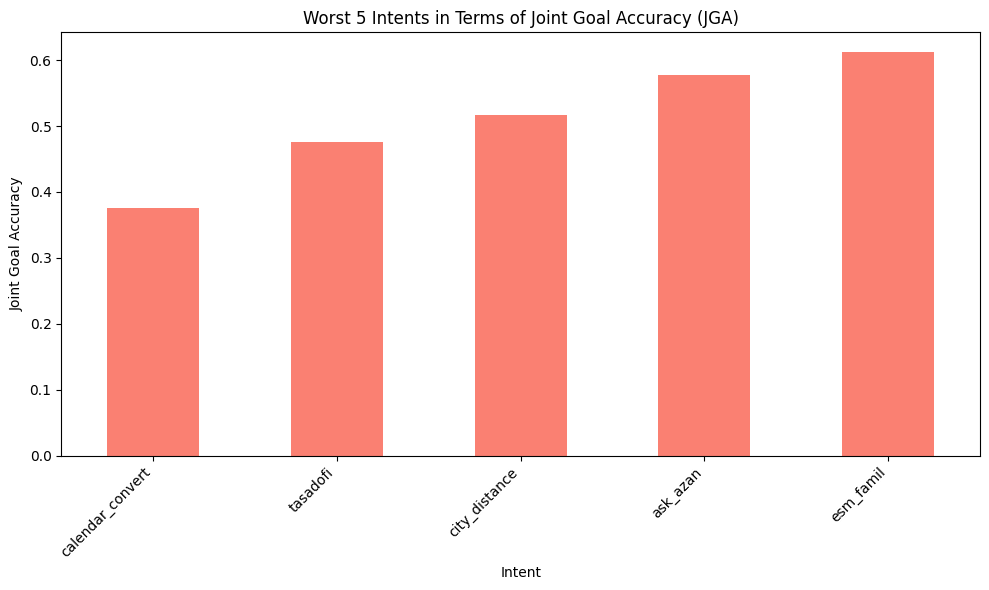

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame creation for demonstration (replace this with your actual DataFrame)
# df = pd.read_csv('your_data.csv')  # Load your actual data

# Recalculate the Joint Goal Accuracy (JGA) column
df['joint_goal'] = df.apply(lambda row: row['intent_flag'] == 1 and row['slot_percentage'] == 1.0 and row['whatever_check']==1.0 and row['status_flag']==1.0 and row['DST_Performance']==1, axis=1)

# Calculate Joint Goal Accuracy (JGA) for each intent
jga_per_intent = df.groupby('original_intent')['joint_goal'].mean()

# Sort intents by JGA in ascending order
jga_sorted = jga_per_intent.sort_values()

# Identify the worst intents
num_worst_intents = 5  # Change this number to see more or fewer worst intents
worst_intents = jga_sorted.head(num_worst_intents)

print(f"Worst {num_worst_intents} intents in terms of JGA:")
print(worst_intents)

# Plot the worst intents
plt.figure(figsize=(10, 6))
worst_intents.plot(kind='bar', color='salmon')
plt.xlabel('Intent')
plt.ylabel('Joint Goal Accuracy')
plt.title(f'Worst {num_worst_intents} Intents in Terms of Joint Goal Accuracy (JGA)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

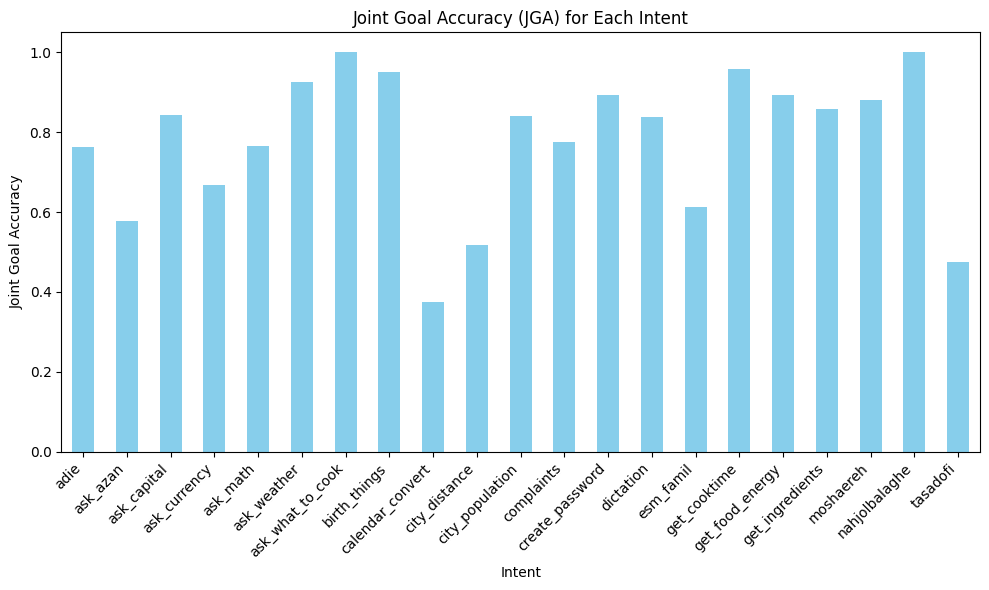

In [23]:
# Recalculate the Joint Goal Accuracy (JGA) column
df['joint_goal'] = df.apply(lambda row: row['intent_flag'] == 1 and row['slot_percentage'] == 1.0 and row['whatever_check']==1.0 and row['status_flag']==1.0 and row['DST_Performance']==1, axis=1)
# Calculate Joint Goal Accuracy (JGA) for each intent
jga_per_intent = df.groupby('original_intent')['joint_goal'].mean()

# Plot Joint Goal Accuracy (JGA) for each intent
plt.figure(figsize=(10, 6))
jga_per_intent.plot(kind='bar', color='skyblue')
plt.xlabel('Intent')
plt.ylabel('Joint Goal Accuracy')
plt.title('Joint Goal Accuracy (JGA) for Each Intent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Flexible Goal Accuracy (FGA)
The proportion of turns where either the intent or the slots are correctly identified.

In [17]:
# Calculate Flexible Goal Accuracy (FGA)
df['flexible_goal'] = df.apply(lambda row: row['intent_flag'] == 1 or row['slot_percentage'] == 1.0 or  row['whatever_check']==1.0 or row['status_flag']==1.0 or row['DST_Performance']==1, axis=1)
fga = df['flexible_goal'].mean()

print(f"Flexible Goal Accuracy (FGA): {fga}")

Flexible Goal Accuracy (FGA): 0.9992175273865415


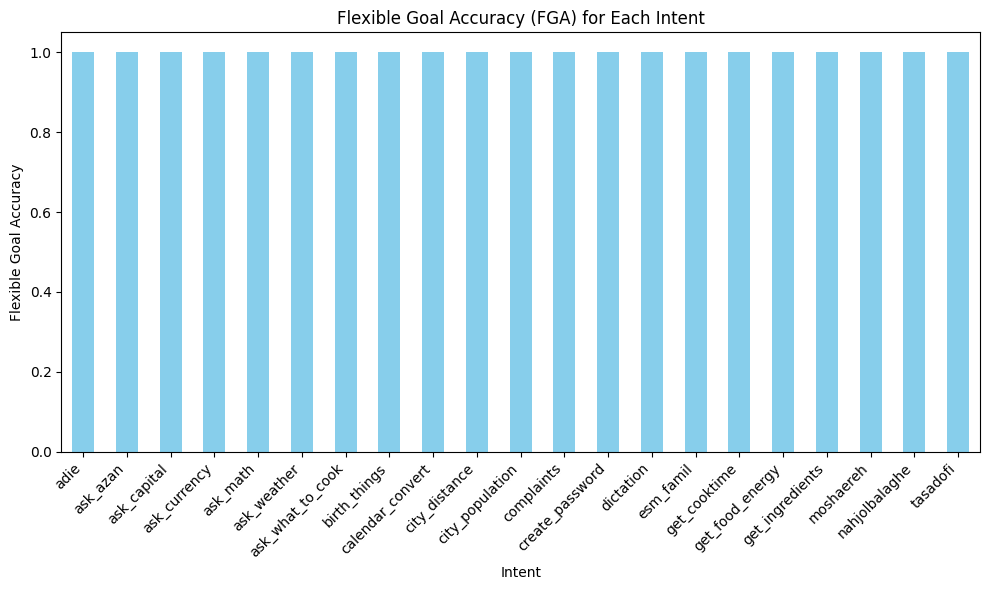

In [18]:
# Recalculate the Flexible Goal Accuracy (FGA) column
df['flexible_goal'] = df.apply(lambda row: row['intent_flag'] == 1 or row['slot_percentage'] == 1.0 or  row['whatever_check']==1.0 or row['status_flag']==1.0 or row['DST_Performance']==1, axis=1)

# Calculate Flexible Goal Accuracy (FGA) for each intent
fga_per_intent = df.groupby('original_intent')['flexible_goal'].mean()

# Plot Flexible Goal Accuracy (FGA) for each intent
plt.figure(figsize=(10, 6))
fga_per_intent.plot(kind='bar', color='skyblue')
plt.xlabel('Intent')
plt.ylabel('Flexible Goal Accuracy')
plt.title('Flexible Goal Accuracy (FGA) for Each Intent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Average Goal Accuracy

In [24]:
# Calculate AGA
status_accuracy = (df['status_flag'] == 1).mean()
whatever_accuracy = (df['whatever_check'] == 1).mean()
intent_accuracy = (df['intent_flag'] == 1).mean()
slot_accuracy = (df['slot_percentage'] == 1).mean()
DST_accuracy = (df['DST_Performance'] == 1).mean()
aga = (status_accuracy + slot_accuracy + intent_accuracy + whatever_accuracy+DST_accuracy)/5

print(f'status average : {status_accuracy}')
print(f'whatever average : {whatever_accuracy}')
print(f'intent average : {intent_accuracy}')
print(f'slot average : {slot_accuracy}')
print(f'DST average : {DST_accuracy}')
print(f"Average Goal Accuracy (AGA): {aga}")

status average : 0.8161189358372457
whatever average : 0.9953051643192489
intent average : 0.9913928012519562
slot average : 0.7582159624413145
DST average : 0.9992175273865415
Average Goal Accuracy (AGA): 0.9120500782472615


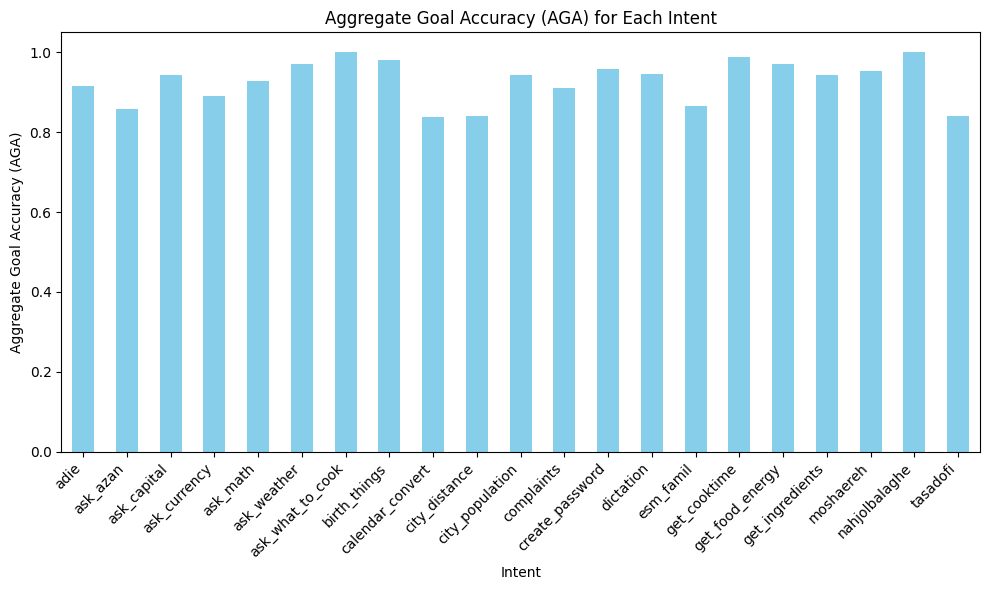

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert columns to numeric types, coercing errors to NaN
df['slot_percentage'] = pd.to_numeric(df['slot_percentage'], errors='coerce')
df['whatever_check'] = pd.to_numeric(df['whatever_check'], errors='coerce')
df['status_flag'] = pd.to_numeric(df['status_flag'], errors='coerce')
df['intent_flag'] = pd.to_numeric(df['intent_flag'], errors='coerce')
df['DST_Performance'] = pd.to_numeric(df['DST_Performance'], errors='coerce')
# Calculate AGA for each intent
def calculate_aga(group):
    intent_accuracy = (group['intent_flag']==1).mean()
    slot_accuracy = (group['slot_percentage'] == 1.0).mean()
    whatever_check_accuracy = (group['whatever_check'] == 1.0).mean()
    status_accuracy = (group['status_flag'] == 1.0).mean()
    DST_accuracy = (df['DST_Performance'] == 1).mean()
    return (intent_accuracy + slot_accuracy + whatever_check_accuracy + status_accuracy+DST_accuracy) / 5

aga_per_intent = df.groupby('original_intent').apply(calculate_aga)

# Plot the AGA for each intent
plt.figure(figsize=(10, 6))
aga_per_intent.plot(kind='bar', color='skyblue')
plt.xlabel('Intent')
plt.ylabel('Aggregate Goal Accuracy (AGA)')
plt.title('Aggregate Goal Accuracy (AGA) for Each Intent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Status Accuracy

In [26]:
# Calculate Status Accuracy
df['status_accuracy'] = df.apply(lambda row: row['status_flag'] == 1, axis=1)
status_accuracy = df['status_accuracy'].mean()

print(f"Status Accuracy: {status_accuracy}")

Status Accuracy: 0.8161189358372457


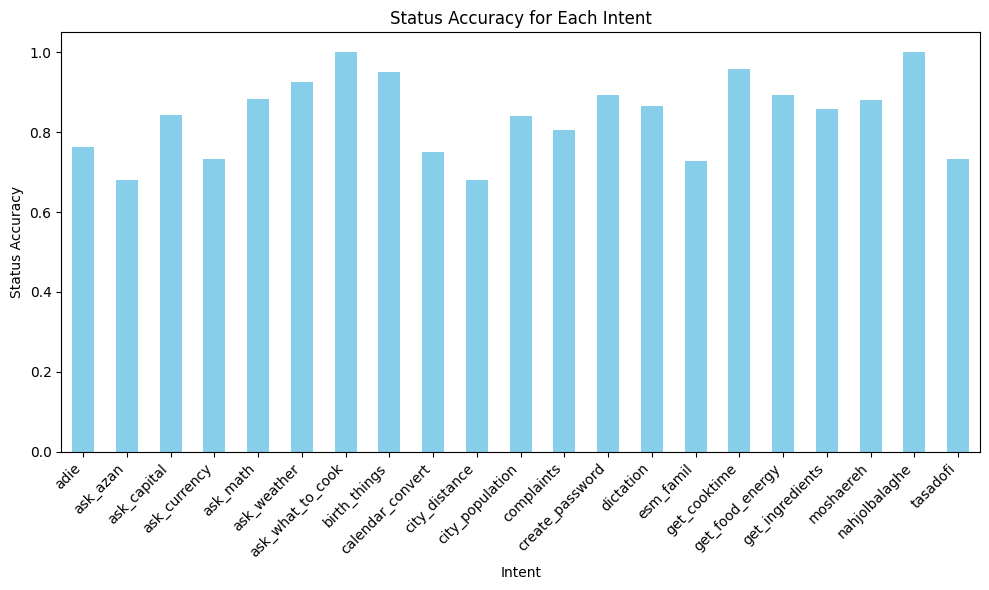

In [27]:
# Calculate Dialogue Turn Accuracy
df['status_accuracy'] = df.apply(lambda row: row['status_flag'] == 1, axis=1)
# Calculate Dialogue Turn Accuracy for each intent
status_accuracy_per_intent = df.groupby('original_intent')['status_accuracy'].mean()

# Plot Dialogue Turn Accuracy for each intent
plt.figure(figsize=(10, 6))
status_accuracy_per_intent.plot(kind='bar', color='skyblue')
plt.xlabel('Intent')
plt.ylabel('Status Accuracy')
plt.title('Status Accuracy for Each Intent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Slot Filling Accuracy

In [28]:
slot_filling_accuracy = df['slot_percentage'].mean()
print(slot_filling_accuracy)

0.8187261848081376


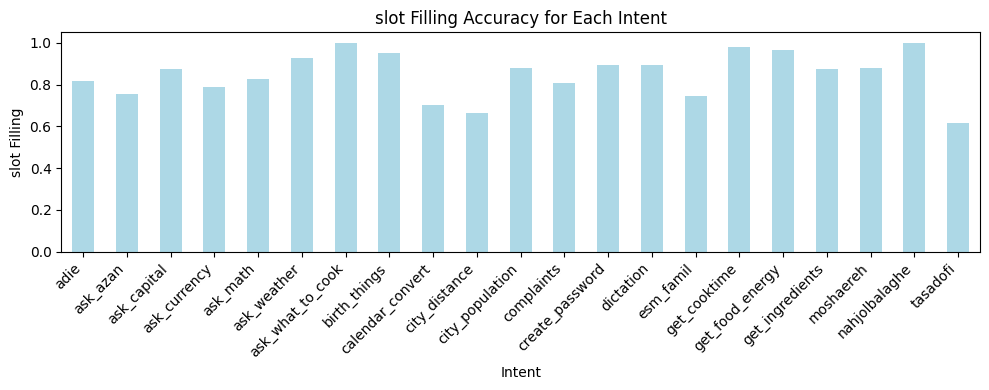

In [29]:
# Calculate Slot Filling Accuracy for each intent
slot_filling_accuracy_per_intent = df.groupby('original_intent')['slot_percentage'].mean()

# Plot Slot Filling Accuracy for each intent
plt.figure(figsize=(10, 4))
slot_filling_accuracy_per_intent.plot(kind='bar', color='lightblue')
plt.xlabel('Intent')
plt.ylabel('slot Filling')
plt.title('slot Filling Accuracy for Each Intent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Intent Recognition Accuracy
This metric measures the percentage of correctly identified intents out of all intents.


In [30]:
# Intent Recognition Accuracy
intent_recognition_accuracy = df['intent_flag'].mean()

print(f"Intent Recognition Accuracy: {intent_recognition_accuracy}")

Intent Recognition Accuracy: 0.9921691464369328


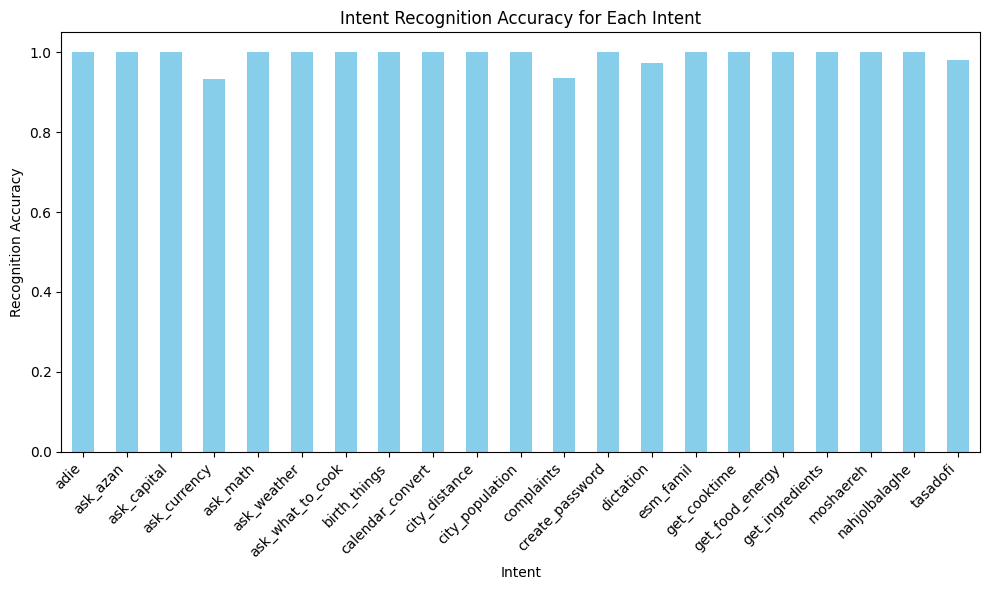

In [31]:
# Calculate Intent Recognition Accuracy for each intent
intent_accuracy = df.groupby('original_intent')['intent_flag'].mean()

# Plot Intent Recognition Accuracy for each intent
plt.figure(figsize=(10, 6))
intent_accuracy.plot(kind='bar', color='skyblue')
plt.xlabel('Intent')
plt.ylabel('Recognition Accuracy')
plt.title('Intent Recognition Accuracy for Each Intent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Whatever Accuracy

In [36]:
# whatever Accuracy
whatever_accuracy = df['whatever_check'].mean()

print(f"Whatever Accuracy: {whatever_accuracy}")

Whatever Accuracy: 0.9960845732184664


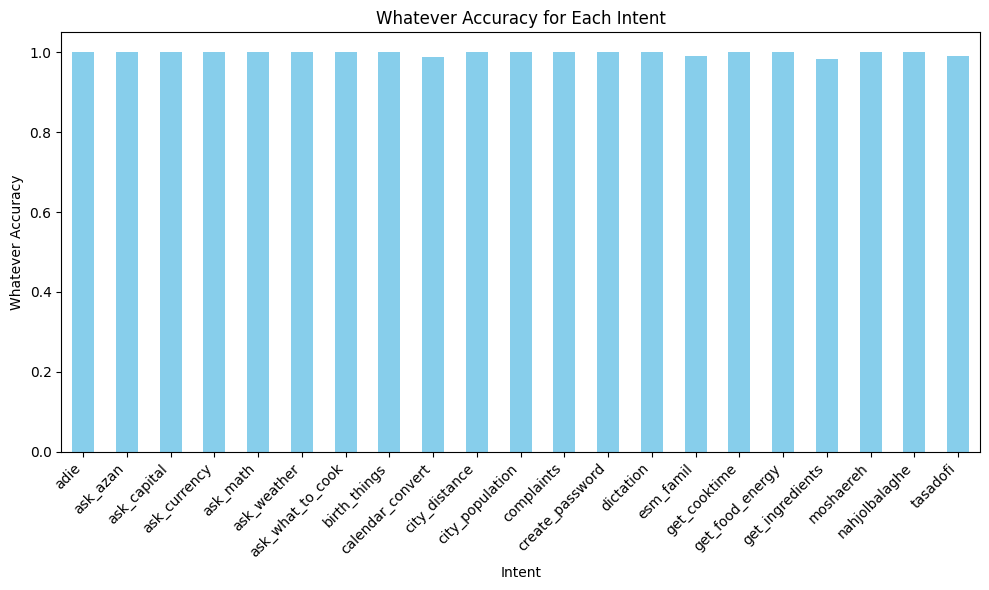

In [37]:
# Calculate whatever_accuracy
whatever_accuracy = df.groupby('original_intent')['whatever_check'].mean()

# Plot Intent Recognition Accuracy for each intent
plt.figure(figsize=(10, 6))
whatever_accuracy.plot(kind='bar', color='skyblue')
plt.xlabel('Intent')
plt.ylabel('Whatever Accuracy')
plt.title('Whatever Accuracy for Each Intent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### DST Accuracy

In [35]:
# DST Accuracy
DST_accuracy = df['DST_Performance'].mean()

print(f"DST Accuracy: {DST_accuracy}")

DST Accuracy: 1.0


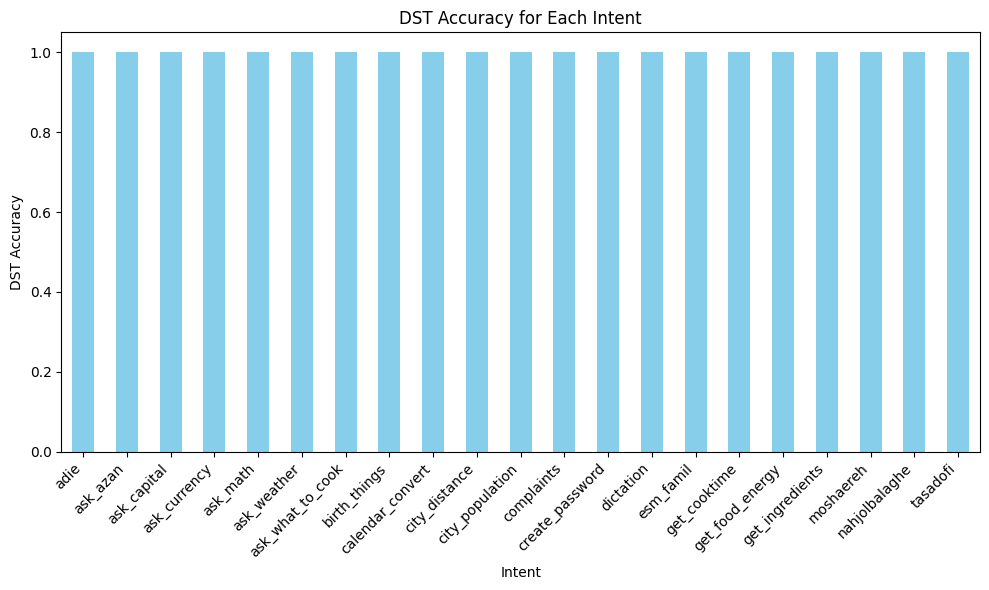

In [38]:
# Calculate whatever_accuracy
whatever_accuracy = df.groupby('original_intent')['DST_Performance'].mean()

# Plot Intent Recognition Accuracy for each intent
plt.figure(figsize=(10, 6))
whatever_accuracy.plot(kind='bar', color='skyblue')
plt.xlabel('Intent')
plt.ylabel('DST Accuracy')
plt.title('DST Accuracy for Each Intent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### DST server performance by intent

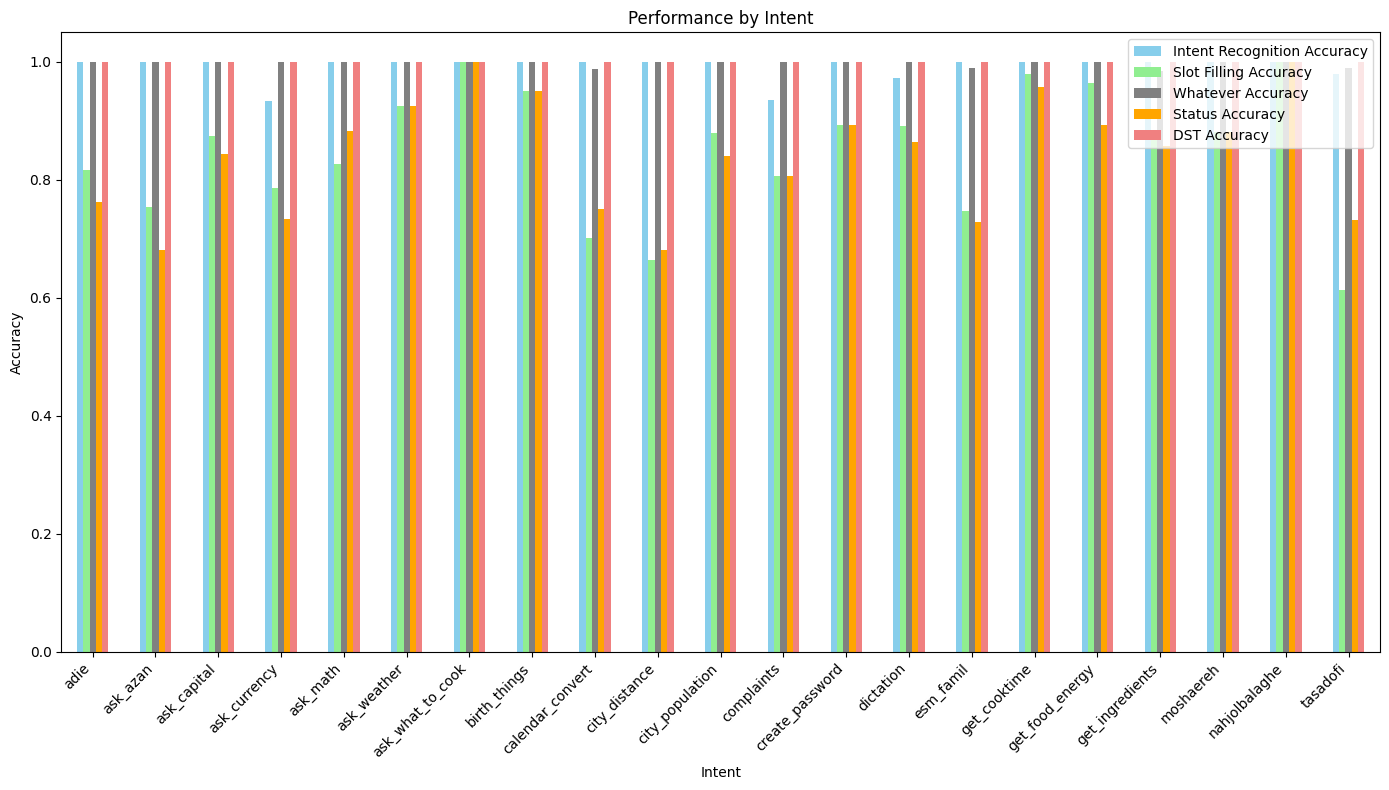

In [43]:
# Calculate Intent Recognition Accuracy for each intent
intent_recognition_accuracy_per_intent = df.groupby('original_intent')['intent_flag'].mean()

# Calculate Slot Filling Accuracy for each intent
slot_filling_accuracy_per_intent = df.groupby('original_intent')['slot_percentage'].mean()

# Calculate Slot Filling Accuracy for each intent
whatever_accuracy_per_intent = df.groupby('original_intent')['whatever_check'].mean()

# Calculate Slot Filling Accuracy for each intent
status_accuracy_per_intent = df.groupby('original_intent')['status_flag'].mean()

# Calculate DST Accuracy for each intent
dst_accuracy_per_intent = df.groupby('original_intent')['DST_Performance'].mean()

#
# # Calculate Joint Goal Accuracy (JGA) for each intent
# jga_per_intent = df.groupby('original_intent')['joint_goal'].mean()
#
# # Calculate Flexible Goal Accuracy (FGA) for each intent
# fga_per_intent = df.groupby('original_intent')['flexible_goal'].mean()
#
# # Calculate Average Goal Accuracy (AGA) for each intent
# aga_per_intent = df.groupby('original_intent')['average_goal'].mean()
#
# # Calculate Average Goal Accuracy (AGA) for each intent
# aga_per_intent = df.groupby('original_intent')['average_goal'].mean()

# Combine all metrics into a single DataFrame for plotting
performance_metrics = pd.DataFrame({
    'Intent Recognition Accuracy': intent_recognition_accuracy_per_intent,
    'Slot Filling Accuracy': slot_filling_accuracy_per_intent,
    'Whatever Accuracy': whatever_accuracy_per_intent,
    'Status Accuracy': status_accuracy_per_intent,
    'DST Accuracy': dst_accuracy_per_intent
})

# Plot the combined metrics
performance_metrics.plot(kind='bar', figsize=(14, 8), color=['skyblue', 'lightgreen', 'grey','orange','lightcoral'])
plt.xlabel('Intent')
plt.ylabel('Accuracy')
plt.title('Performance by Intent')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

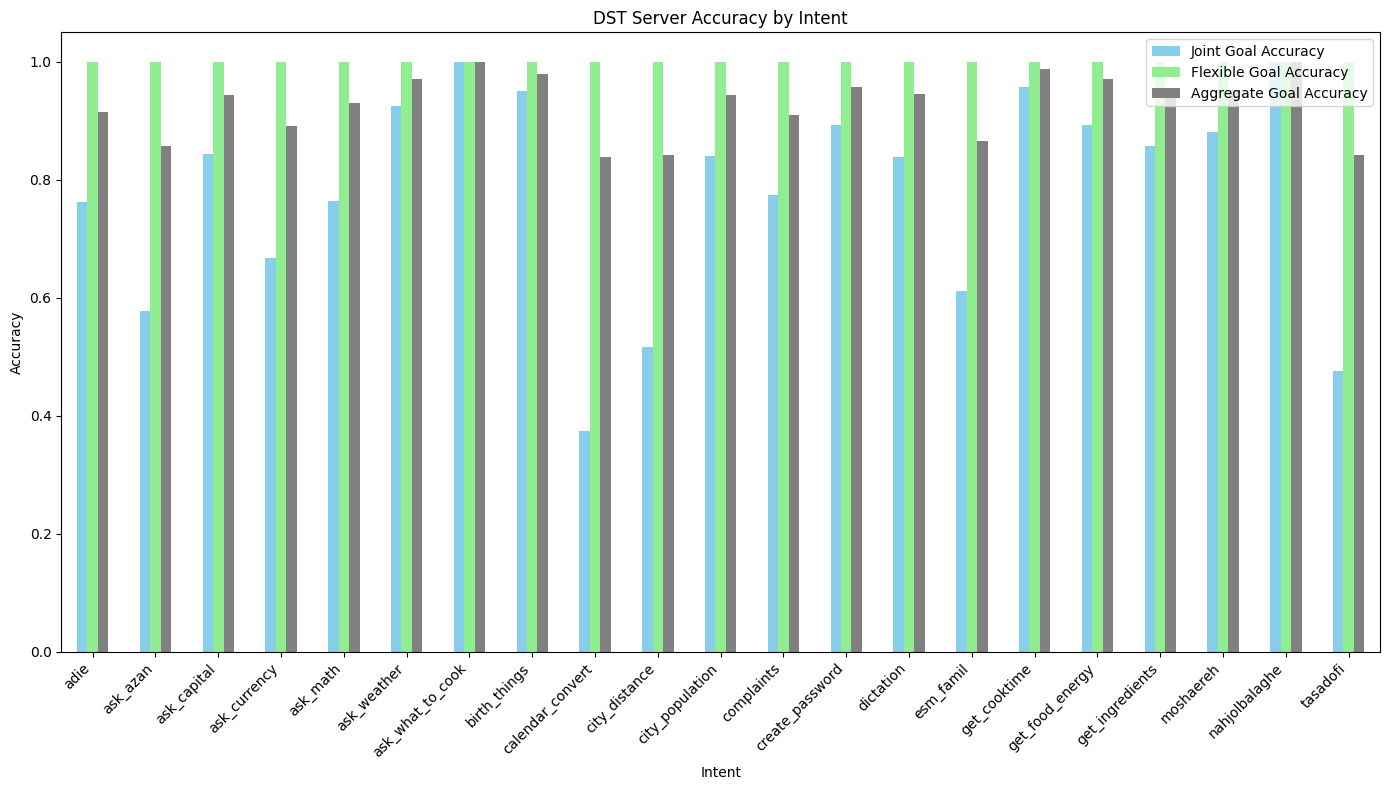

In [44]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert columns to numeric types, coercing errors to NaN
df['slot_percentage'] = pd.to_numeric(df['slot_percentage'], errors='coerce')
df['whatever_check'] = pd.to_numeric(df['whatever_check'], errors='coerce')
df['status_flag'] = pd.to_numeric(df['status_flag'], errors='coerce')
df['intent_flag'] = pd.to_numeric(df['intent_flag'], errors='coerce')
df['DST_Performance'] = pd.to_numeric(df['DST_Performance'], errors='coerce')

# Define the function to calculate AGA
def calculate_aga(group):
    intent_accuracy = (group['intent_flag'] == 1).mean()
    slot_accuracy = (group['slot_percentage'] == 1.0).mean()
    whatever_check_accuracy = (group['whatever_check'] == 1.0).mean()
    status_accuracy = (group['status_flag'] == 1.0).mean()
    dst_accuracy = (group['DST_Performance'] == 1.0).mean()
    return (intent_accuracy + slot_accuracy + whatever_check_accuracy + status_accuracy+dst_accuracy) / 5

# Calculate AGA for each intent
aga_per_intent = df.groupby('original_intent').apply(calculate_aga)

# Assuming 'joint_goal' and 'flexible_goal' columns are already present in the DataFrame
# Calculate JGA and FGA for each intent
jga_per_intent = df.groupby('original_intent')['joint_goal'].mean()
fga_per_intent = df.groupby('original_intent')['flexible_goal'].mean()

# Combine all metrics into a single DataFrame for plotting
performance_metrics = pd.DataFrame({
    'Joint Goal Accuracy': jga_per_intent,
    'Flexible Goal Accuracy': fga_per_intent,
    'Aggregate Goal Accuracy': aga_per_intent
})

# Plot the combined metrics
plt.figure(figsize=(14, 8))
performance_metrics.plot(kind='bar', figsize=(14, 8), color=['skyblue', 'lightgreen', 'grey','orange','lightcoral'])
plt.xlabel('Intent')
plt.ylabel('Accuracy')
plt.title('DST Server Accuracy by Intent')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()